In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display,Markdown

In [2]:
data = pd.read_csv("ruben-reproduction-new.csv")
data.head()

,value,Set,Type,ID,Target,Model,InptRep,Dataset,GT,Fold
0,115.647057,test,target,16_01_0,RT,transformer1d,traces,vicar,0,0
1,142.744400,test,pred,16_01_0,RT,transformer1d,traces,vicar,0,0
2,117.866669,test,target,16_01_1,RT,transformer1d,traces,vicar,0,0
3,142.744400,test,pred,16_01_1,RT,transformer1d,traces,vicar,0,0
4,118.000000,test,target,16_01_2,RT,transformer1d,traces,vicar,0,0


In [7]:
data_pvt = data.pivot(index=["ID","Target","Model","InptRep","Dataset","GT","Fold"],columns='Type',values='value').reset_index()
data_pvt.head()


Type,ID,Target,Model,InptRep,Dataset,GT,Fold,pred,target
0,01_01_0,AUP,resnet1d,traces,vicar,0,5,6.722253,9.802522
1,01_01_0,AUP,resnet1d,traces,vicar,1,0,9.023586,9.802522
2,01_01_0,AUP,resnet2d,cwt,vicar,0,5,9.752971,9.802522
3,01_01_0,AUP,resnet2d,cwt,vicar,1,0,9.851137,9.802522
4,01_01_0,AUP,resnet2d,ibis,vicar,0,5,9.847565,9.802522


## Using GT:0 vicar

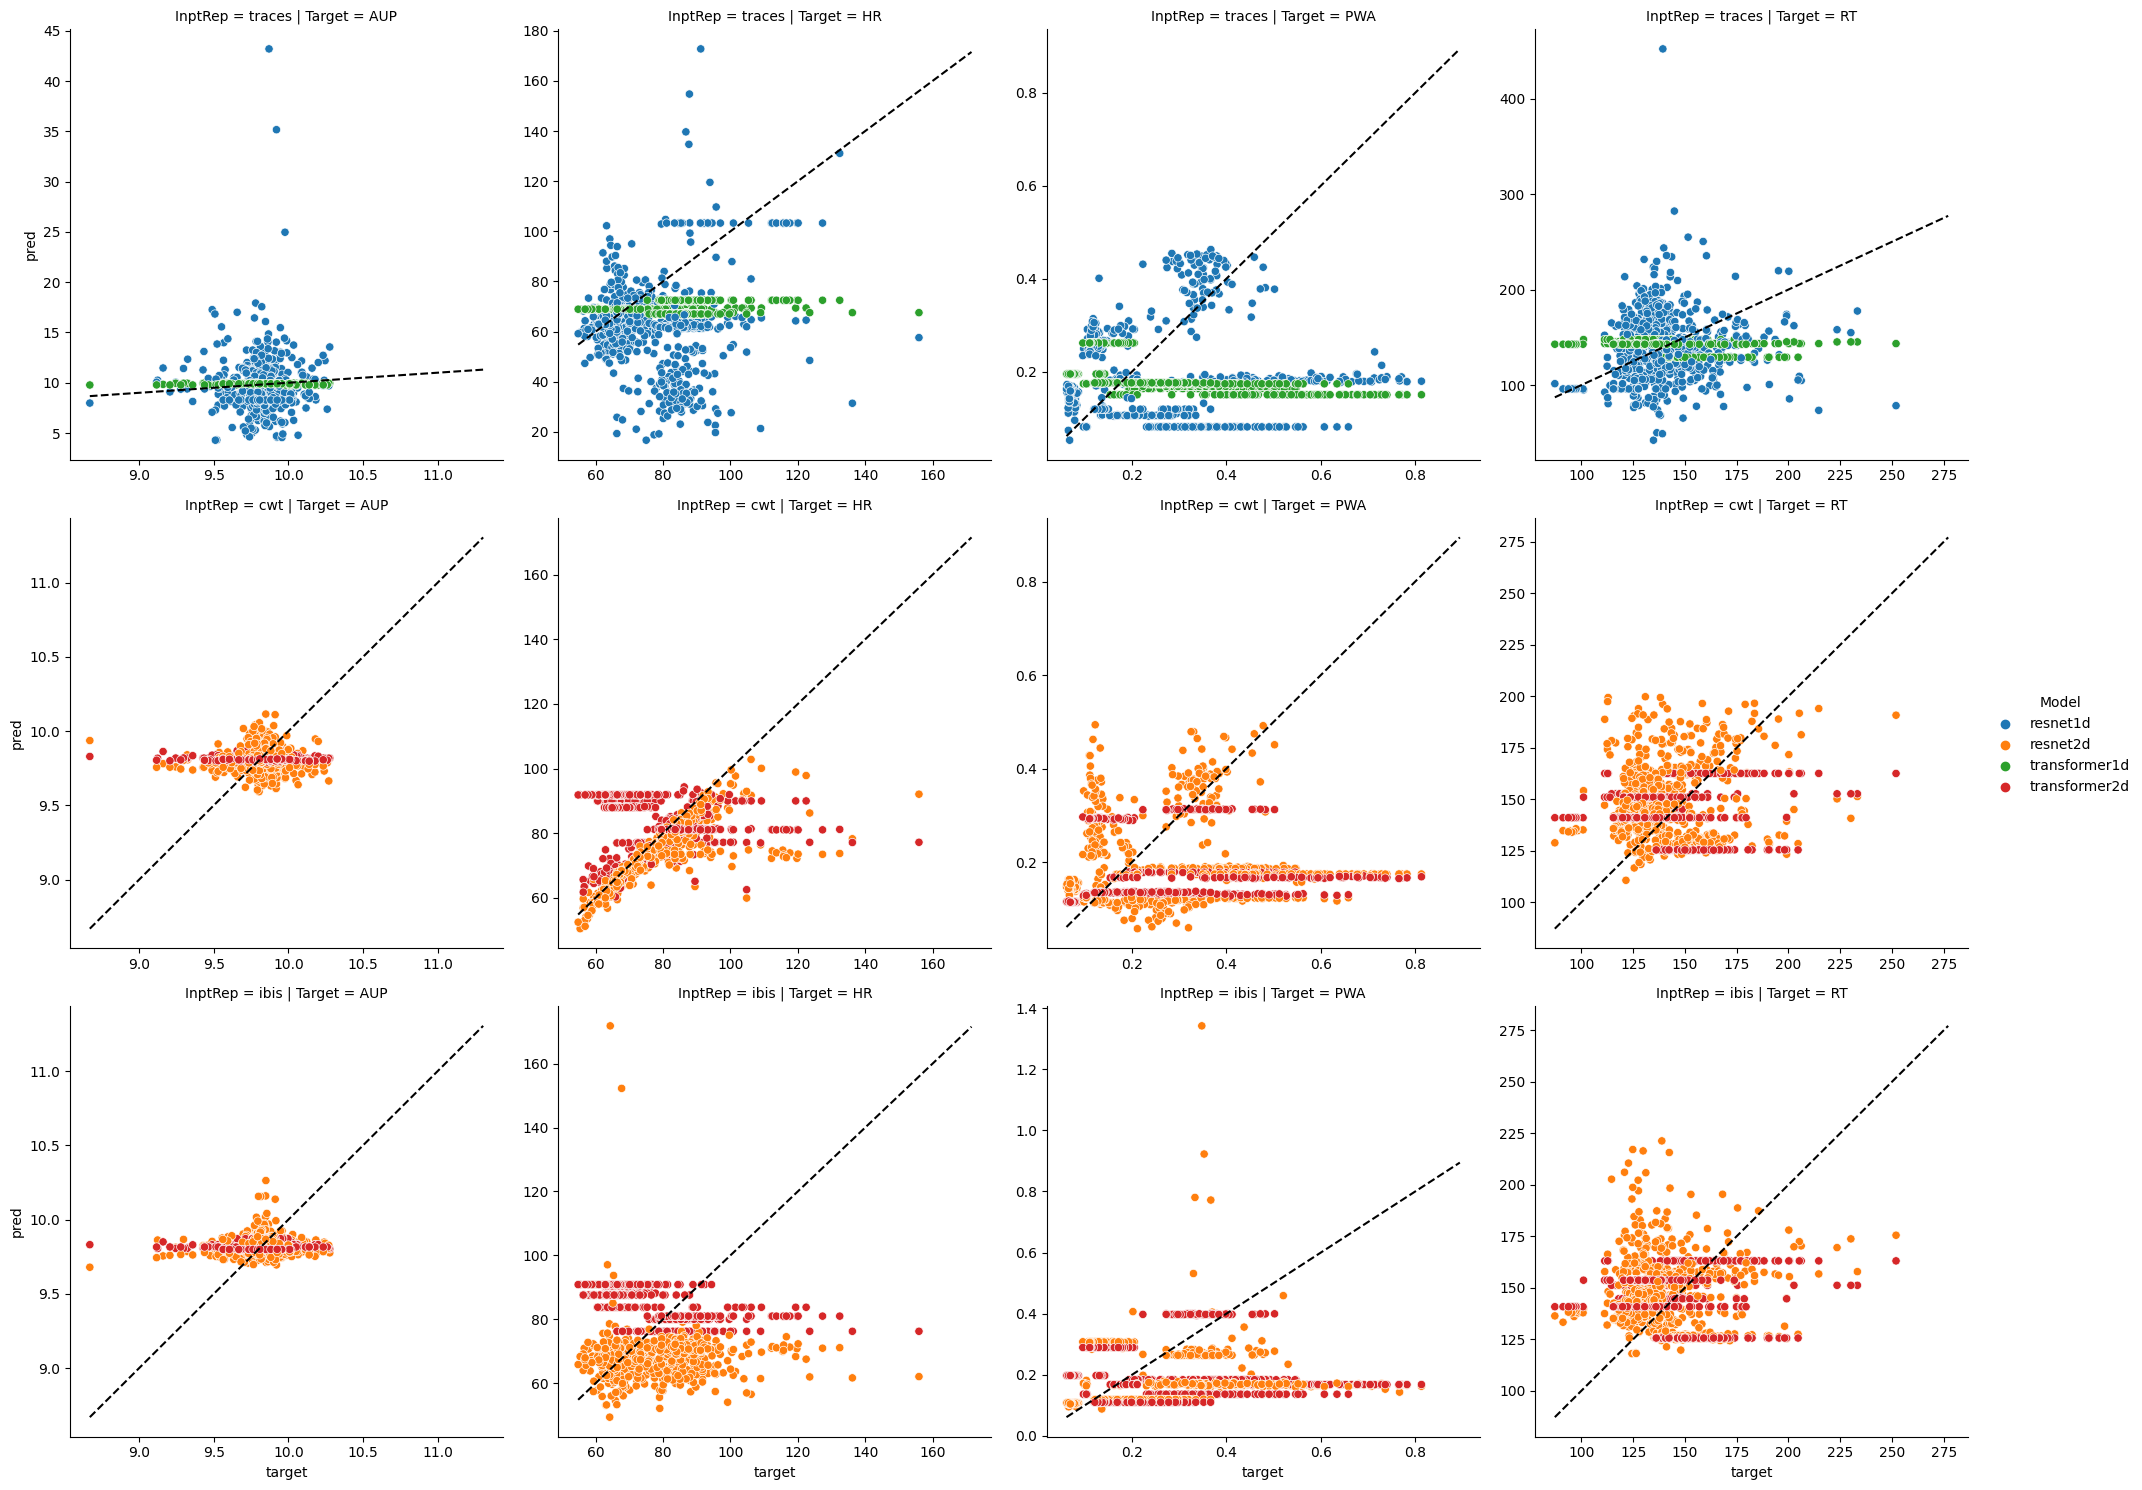

## Using GT:0 vipl

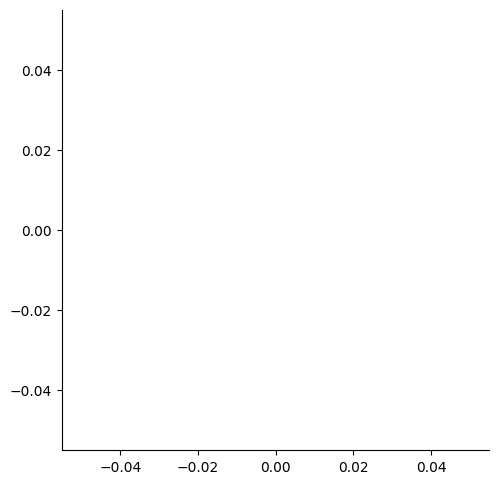

## Using GT:1 vicar

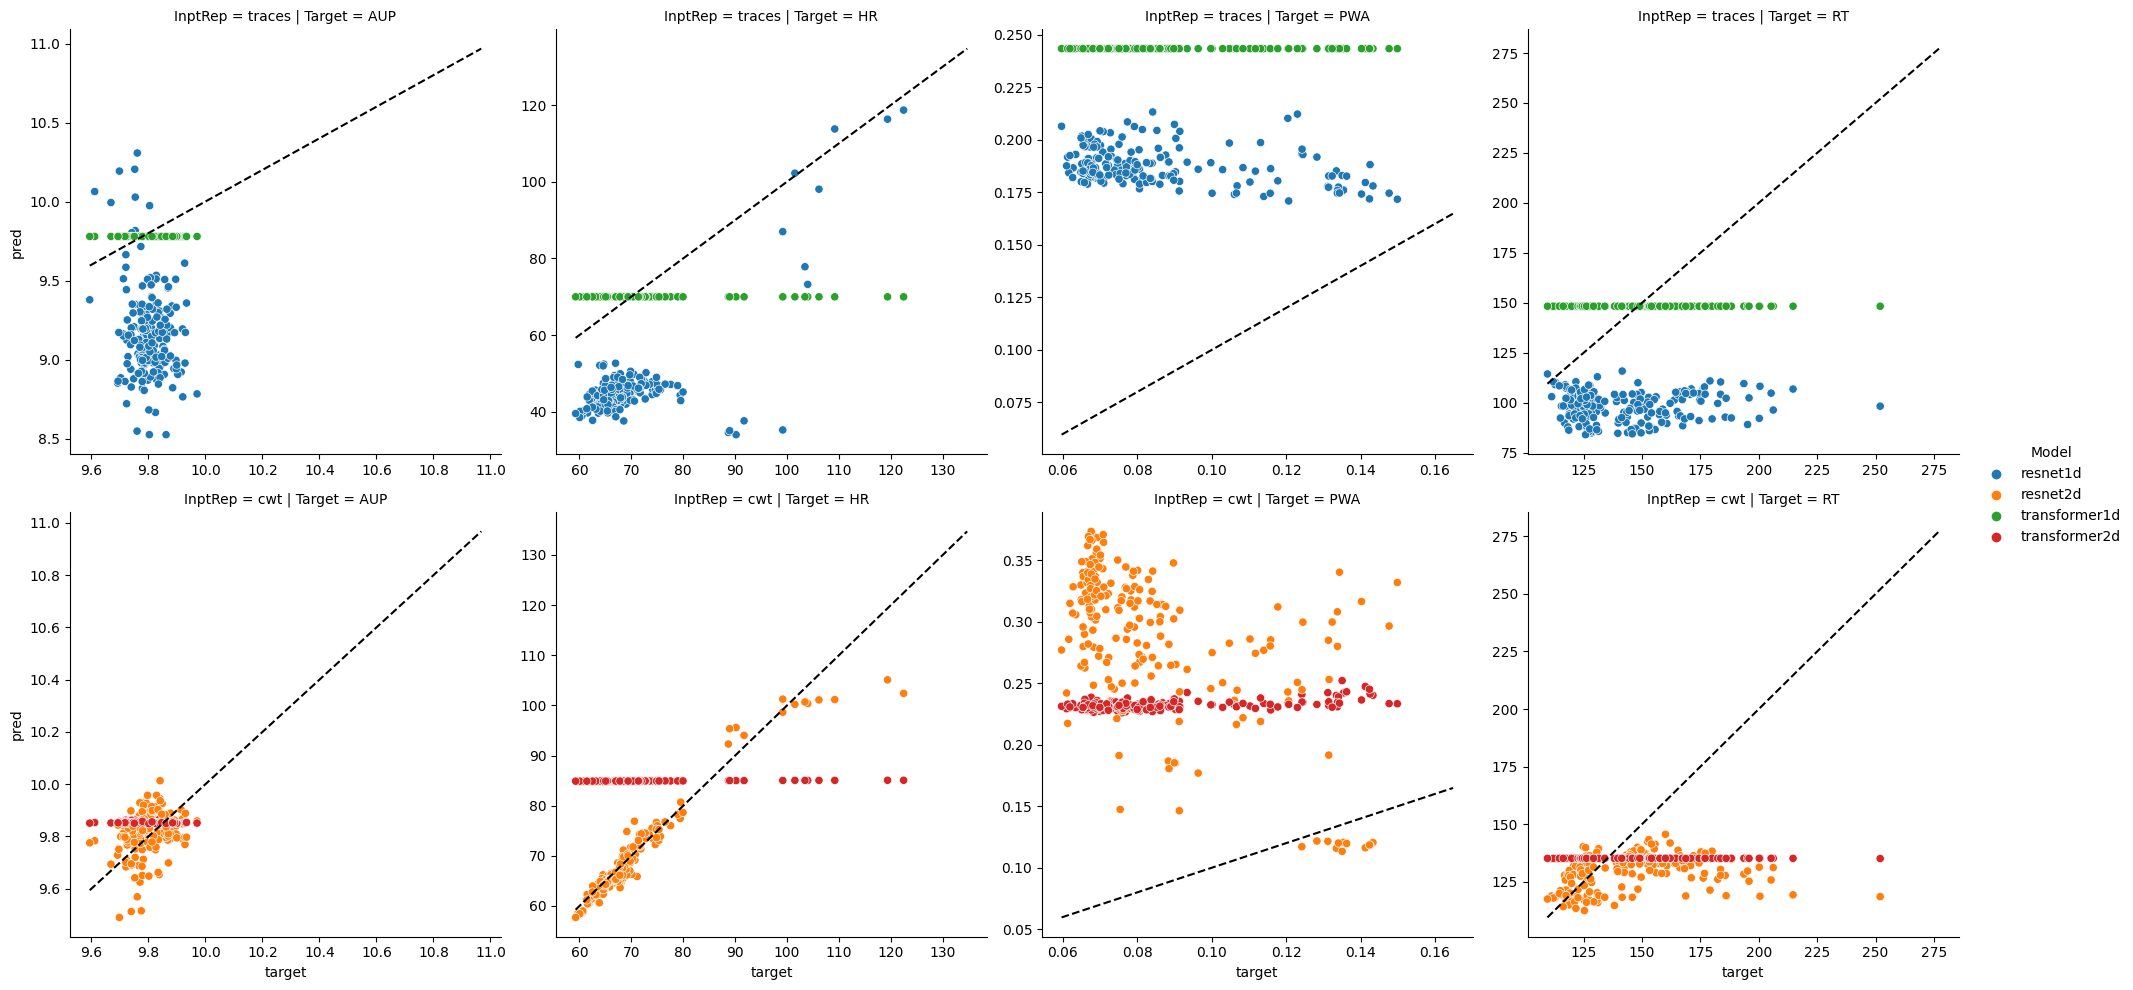

## Using GT:1 vipl

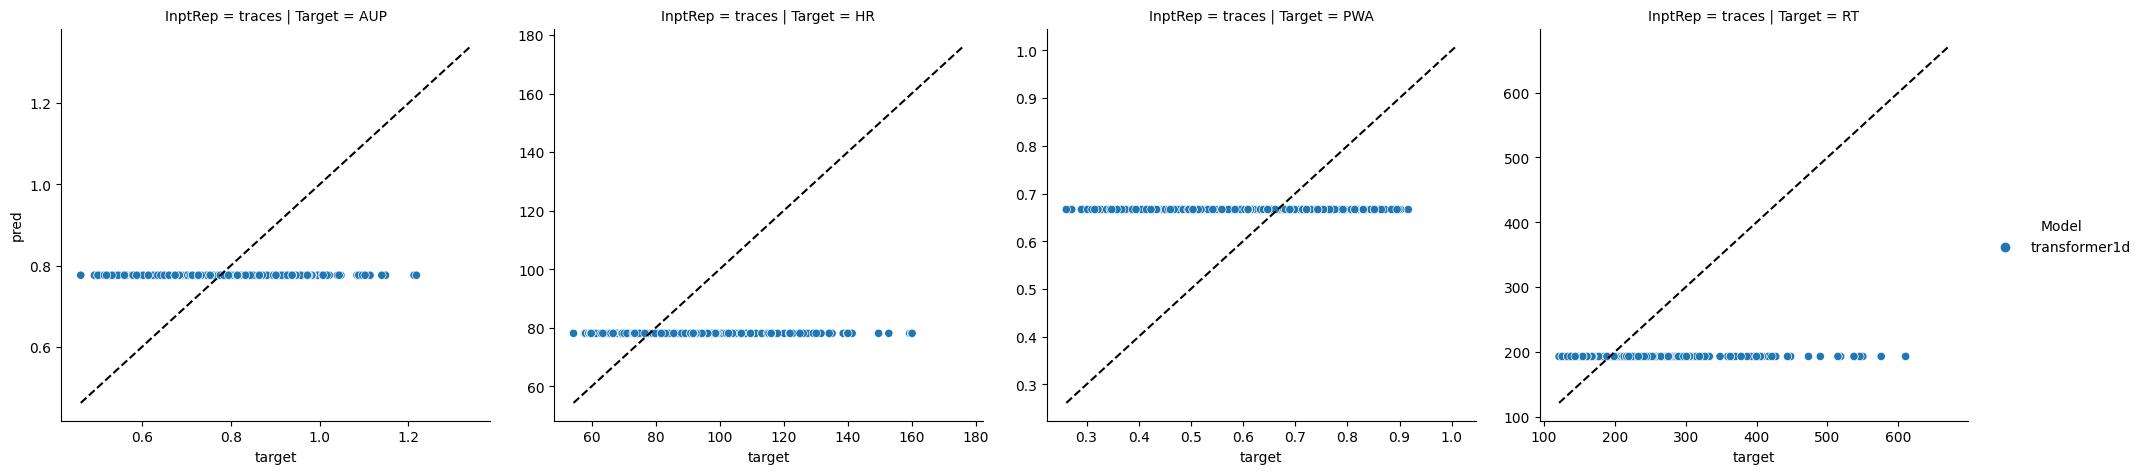

In [22]:
data_pvt_mean = data_pvt.groupby(["ID","Target","Model","InptRep","Dataset","GT"]).mean().reset_index()
for gt in data_pvt_mean.GT.unique():
    for dataset in data_pvt_mean.Dataset.unique():
        display(Markdown(f"## Using GT:{gt} {dataset}"))
        plt_df = data_pvt_mean.query(f"GT == {gt} and Dataset == '{dataset}'")
        g = sns.relplot(data=plt_df, y='pred', x='target',hue='Model',col='Target',row='InptRep',kind='scatter',facet_kws={'sharex':False,'sharey':False})
        
        for ax,(ax_idx,sub_plt_df) in zip(g.axes.flat,g.facet_data()):            
            x = (sub_plt_df.target.min(),sub_plt_df.target.max()*1.1)
            y = (sub_plt_df.target.min(),sub_plt_df.target.max()*1.1)
            # ax.set_aspect('equal')            
            ax.plot(y, x,'--k')

        plt.show()

In [61]:
acc = lambda x: np.mean(np.abs(x['target'] - x['pred']))
corr = lambda x: np.mean(x['target'].corr(x['pred']))
a = data_pvt.groupby(["Target","Model","InptRep","Dataset","GT"]).apply(acc)
a = a.to_frame().reset_index()
for gt in data_pvt_mean.GT.unique():    
        display(Markdown(f"## Using GT: {gt}"))
        b = a.query(f"GT == {gt}").pivot(columns=['Dataset',"Target"],index=['Model','InptRep'],values=0)
        display(b.style.background_gradient(axis=0, cmap="RdYlGn_r"))

## Using GT: 0

## Using GT: 1

,Dataset,vicar,vipl,vicar,vipl,vicar,vipl,vicar,vipl
,Target,AUP,AUP,HR,HR,PWA,PWA,RT,RT
Model,InptRep,,,,,,,,
resnet1d,traces,0.673113,nan,23.205156,nan,0.102447,nan,44.863320,nan
resnet2d,cwt,0.067694,nan,1.559945,nan,0.202019,nan,18.342683,nan
transformer1d,traces,0.047387,0.087496,5.983159,11.151891,0.158288,0.134414,20.471205,43.486995
transformer2d,cwt,0.062640,nan,17.509809,nan,0.146958,nan,19.156869,nan


In [62]:
a = data_pvt.groupby(["Target","Model","InptRep","Dataset","GT"]).apply(corr)
a = a.to_frame().reset_index()
for gt in data_pvt_mean.GT.unique():    
        display(Markdown(f"## Using GT: {gt}"))
        b = a.query(f"GT == {gt}").pivot(columns=['Dataset',"Target"],index=['Model','InptRep'],values=0)
        display(b.style.background_gradient(axis=None, vmin=-1,vmax=1,cmap="RdYlGn"))

## Using GT: 0

## Using GT: 1

,Dataset,vicar,vipl,vicar,vipl,vicar,vipl,vicar,vipl
,Target,AUP,AUP,HR,HR,PWA,PWA,RT,RT
Model,InptRep,,,,,,,,
resnet1d,traces,-0.208051,nan,0.764979,nan,-0.316319,nan,0.011190,nan
resnet2d,cwt,0.272688,nan,0.968824,nan,-0.585748,nan,0.255915,nan
transformer1d,traces,0.065463,0.027226,0.047880,-0.041634,-0.010824,0.048091,nan,nan
transformer2d,cwt,-0.144401,nan,0.962015,nan,0.541137,nan,0.090778,nan


Type,ID,Model,pred,target
0,01_01_0,transformer2d,84.904915,71.107697
1,01_01_1,transformer2d,84.906059,70.681992
2,01_01_10,transformer2d,84.902275,63.033398
3,01_01_11,transformer2d,84.903419,63.002689
4,01_01_12,transformer2d,84.901947,65.781288
...,...,...,...,...
190,10_07_5,transformer2d,84.928574,75.317192
191,10_07_6,transformer2d,84.914009,71.530731
192,10_07_7,transformer2d,84.914360,70.314003
193,10_07_8,transformer2d,84.922897,71.353012


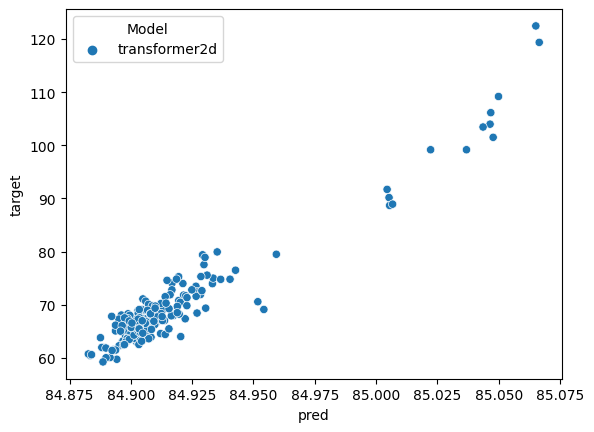

In [86]:
tmp_df = data.query("Dataset == 'vicar' and GT == 1 and Target == 'HR' and Model == 'transformer2d'").pivot(index=['ID','Model'],columns='Type',values='value').reset_index()
display(tmp_df)
sns.scatterplot(data=tmp_df,x='pred',y='target',hue='Model')
plt.show()
